<a href="https://colab.research.google.com/github/chiyeon01/AI-Study/blob/main/YOLO3_With_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ./data
!mkdir ./pretrained

### Dataset는 COCO_Val_2017 version을 사용해 Model을 평가
Dataset_link : [https://cocodataset.org/#download](https://cocodataset.org/#download)
### Model의 cfg, weight file은 YoloV3를 이용. 아래 링크를 통해 다운
Model_link : [https://pjreddie.com/darknet/yolo/](https://pjreddie.com/darknet/yolo/)

In [ ]:
!wget -O ./data/COCODataset_Val_2017.zip http://images.cocodataset.org/zips/val2017.zip
!unzip ./data/COCODataset_Val_2017.zip -d ./data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: ./data/val2017/000000212226.jpg  
 extracting: ./data/val2017/000000231527.jpg  
 extracting: ./data/val2017/000000578922.jpg  
 extracting: ./data/val2017/000000062808.jpg  
 extracting: ./data/val2017/000000119038.jpg  
 extracting: ./data/val2017/000000114871.jpg  
 extracting: ./data/val2017/000000463918.jpg  
 extracting: ./data/val2017/000000365745.jpg  
 extracting: ./data/val2017/000000320425.jpg  
 extracting: ./data/val2017/000000481404.jpg  
 extracting: ./data/val2017/000000314294.jpg  
 extracting: ./data/val2017/000000335328.jpg  
 extracting: ./data/val2017/000000513688.jpg  
 extracting: ./data/val2017/000000158548.jpg  
 extracting: ./data/val2017/000000132116.jpg  
 extracting: ./data/val2017/000000415238.jpg  
 extracting: ./data/val2017/000000321333.jpg  
 extracting: ./data/val2017/000000081738.jpg  
 extracting: ./data/val2017/000000577584.jpg  
 extracting: ./data/val2017/000000346905.jpg  
 extracting: ./data/val2

In [ ]:
# config_file은 raw file의 경로를 받아야 함을 주의

!wget -O ./pretrained/config_file https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget -O ./pretrained/weight_file https://pjreddie.com/media/files/yolov3.weights

--2024-08-17 00:51:41--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘./pretrained/config_file’

./pretrained/config 100%[===================>]   8.15K  --.-KB/s    in 0.001s  

2024-08-17 00:51:41 (13.1 MB/s) - ‘./pretrained/config_file’ saved [8342/8342]

--2024-08-17 00:51:42--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘./pretrained/weight_file’

./pretrained/weight 100%[===================>] 236.52M  53

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

print(cv2.__version__)

4.10.0


(-0.5, 639.5, 425.5, -0.5)

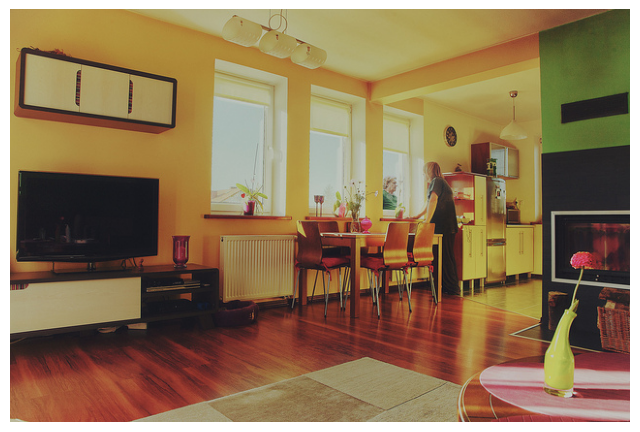

In [ ]:
test_img = cv2.cvtColor(cv2.imread('/content/data/val2017/000000000139.jpg'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(test_img)
plt.axis('off')

In [ ]:
config_file_path = '/content/pretrained/config_file'
weight_file_path = '/content/pretrained/weight_file'

yolo_model = cv2.dnn.readNetFromDarknet(config_file_path, weight_file_path)

In [ ]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

In [ ]:
layer_name = yolo_model.getLayerNames()
output_layer = yolo_model.getUnconnectedOutLayers()
output_layer_name = yolo_model.getUnconnectedOutLayersNames()
print(layer_name)
print(len(layer_name))
print(output_layer)
print(output_layer_name)

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [ ]:
img = cv2.imread('/content/data/val2017/000000000139.jpg')
yolo_model.setInput(cv2.dnn.blobFromImage(img, swapRB=True, size=(416, 416), crop=False, scalefactor=1/255.)) # scalefactor는 model이 train시 0~1사이 값으로 정규화를 진행하여 학습하였는지 여부로 정해줘야한다.

In [ ]:
results = yolo_model.forward(output_layer_name)
#print(results)    # array(...)
#print(type(results))    # tuple
#print(len(results))    # 3
print(results[0][0])

[3.0669816e-02 5.2182175e-02 4.2242473e-01 1.3098361e-01 5.7989471e-09
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

In [ ]:
print(len(results[0]))
print(results[0][0])    # index 0 : middle_x, index 1 : middle_y, index 2 : width, index 3 : heigh, index 4 : objectness score,index 5 ~ : class score

507
[3.0669816e-02 5.2182175e-02 4.2242473e-01 1.3098361e-01 5.7989471e-09
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0

In [ ]:
for cv_out in results:
  print(len(cv_out))

507
2028
8112


In [ ]:
img.shape

(426, 640, 3)

In [ ]:
import numpy as np

height, width = img.shape[:2]
confidence_threshold = 0.5
class_ids = []
confidences = []
bboxes = []

for cv_outs in results:
  for result in cv_outs:
    class_score = result[5:]
    class_id = np.argmax(class_score)
    confidence_score = class_score[class_id]

    if confidence_score >= confidence_threshold:
      print(confidence_score)
      middle_x = result[0] * width
      middle_y = result[1] * height
      wt = result[2] * width
      ht = result[3] * height
      x1 = int(middle_x - wt/2.0)
      y1 = int(middle_y - ht/2.0)
      x2 = int(middle_x + wt/2.0)
      y2 = int(middle_y + ht/2.0)
      class_ids.append(class_id)
      confidences.append(confidence_score)
      bboxes.append([x1, y1, x2, y2])

0.99784184
0.76057476
0.7886567
0.533345
0.5899787
0.9055956
0.7940291
0.9880923
0.9478474
0.99467987
0.68143845
0.680461
0.88614666
0.8603264
0.79420406
0.51803845
0.5366744
0.6721995
0.6028521
0.5192903


In [ ]:
print(class_ids)

[62, 0, 0, 0, 62, 62, 56, 56, 56, 56, 56, 56, 56, 56, 75, 74, 74, 0, 0, 75]


In [ ]:
NMS_threshold = 0.4
nms_idxs = cv2.dnn.NMSBoxes(bboxes=bboxes, scores=confidences, score_threshold=confidence_threshold, nms_threshold=NMS_threshold)

print(nms_idxs)    # nms 방식을 만족하는 index

[ 0  9  5 14  2 16 19]


0.005498647689819336


(-0.5, 639.5, 425.5, -0.5)

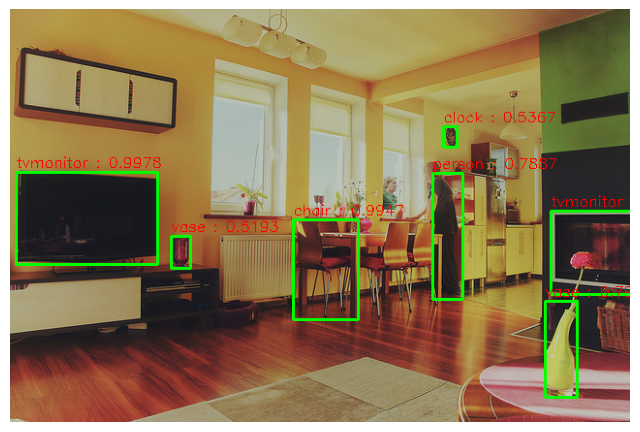

In [ ]:
text_color = (255, 0, 0)
bbox_color = (0, 255, 0)
draw_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for idx in nms_idxs:
  class_name = labels_to_names_seq[class_ids[idx]]
  cf_score = confidences[idx]
  x1, y1, x2, y2 = bboxes[idx]
  caption = "{} : {:.4f}".format(class_name, cf_score)
  cv2.rectangle(draw_img, (x1, y1), (x2, y2), color=bbox_color, thickness=2)
  cv2.putText(draw_img, text=caption, org=(x1, y1 - 5), color=text_color, fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5)

plt.figure(figsize=(8, 8))
plt.imshow(draw_img)
plt.axis('off')

In [ ]:
# inference time을 측정하기 위해 함수로 만들어봄.
import time
import matplotlib.pyplot as plt
%matplotlib inline

def draw_inference_image(model, img, score_thr=0.5, nms_thr=0.4):
  start = time.time()

  draw_img = img.copy()
  output_layer_name = yolo_model.getUnconnectedOutLayersNames()
  model.setInput(cv2.dnn.blobFromImage(img, swapRB=False, size=(416, 416), crop=False, scalefactor=1/255.))
  yolo_outputs = model.forward(output_layer_name)

  height, width = draw_img.shape[:2]
  bboxes = []
  score_confidences = []
  class_ids = []
  bbox_color = (0, 255, 0)
  text_color = (255, 0, 0)

  for outputs in yolo_outputs:
    for output in outputs:
      detection = output[5:]
      max_idx = np.argmax(detection)
      confidence_score = detection[max_idx]
      if confidence_score > score_thr:
        center_x1 = output[0] * width
        center_y1 = output[1] * height
        wt = output[2] * width
        ht = output[3] * height
        x1 = int(center_x1 - wt/2.0)
        y1 = int(center_y1 - ht/2.0)
        x2 = int(center_x1 + wt/2.0)
        y2 = int(center_y1 + ht/2.0)
        class_ids.append(max_idx)
        bboxes.append([x1, y1, x2, y2])
        score_confidences.append(confidence_score)

  nms_idx = cv2.dnn.NMSBoxes(bboxes, score_confidences, score_thr, nms_thr)

  for idx in nms_idx:
    x1, y1, x2, y2 = bboxes[idx]
    cfd_sc = score_confidences[idx]
    class_id = class_ids[idx]
    class_name = labels_to_names_seq[class_id]
    caption = "{} : {:.4f}".format(class_name, cfd_sc)

    cv2.rectangle(draw_img, (x1, y1), (x2, y2), bbox_color, thickness=2)
    cv2.putText(draw_img, caption, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=text_color, thickness=1)

  plt.figure(figsize=(8, 8))
  plt.axis('off')
  plt.imshow(draw_img)
  print(time.time() - start)

1.567979097366333


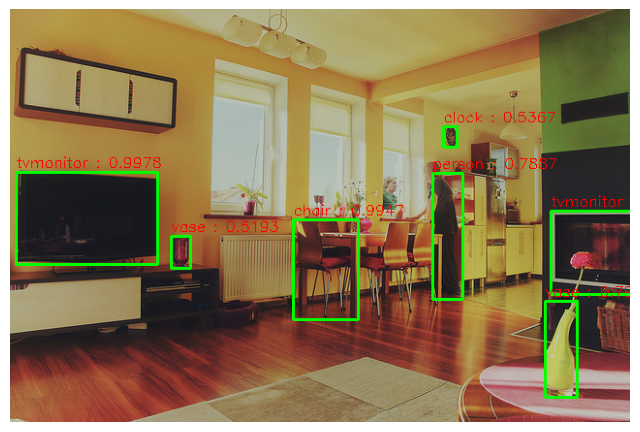

In [ ]:
draw_inference_image(yolo_model, test_img)

In [ ]:
'''
성능은 나쁘지 않은 것 같다.
하지만 YOLO V3정도 되면 fps가 빠를줄 알았는데 그렇지 못함.
GPU에서 실행하면 빠르지만 CPU에서는 좀 느린듯?
CPU에서는 SSD보다 느린 것 같음.
real time이라고 하기엔 좀 부족한 듯하다.
'''

'\n성능은 나쁘지 않은 것 같다.\n하지만 YOLO V3정도 되면 fps가 빠를줄 알았는데 그렇지 못함.\nGPU에서 실행하면 빠르지만 CPU에서는 좀 느린듯?\nCPU에서는 SSD보다 느린 것 같음.\nreal time이라고 하기엔 좀 부족한 듯하다.\n'